In [53]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [54]:
# import file using pandas

city_file = os.path.join('raw_data', 'city_data.csv')
ride_file = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

# drop duplicate records
city_df = city_df.drop_duplicates('city', keep = 'first')

# merge the dataframes
merged_df = city_df.merge(ride_df, on = 'city')

merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


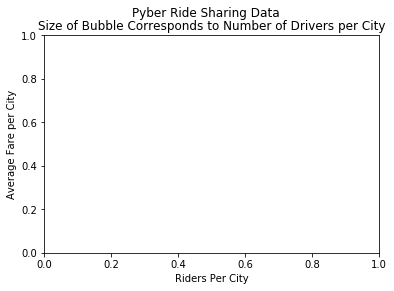

In [57]:
#group be city name
by_city = merged_df.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

#var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type,
})

# Color Dictionary 
colors = ['red', 'yellow', 'green', 'blue']

plt.suptitle('Pyber Ride Sharing Data')

# print scatter plot
plt.title('Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Riders Per City')
plt.ylabel('Average Fare per City')

plt.show()



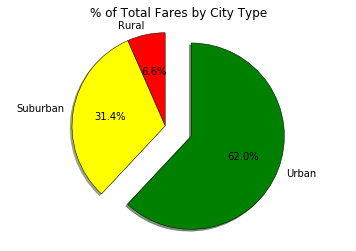

In [35]:
#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = ['red', 'yellow', 'green', 'blue']
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()



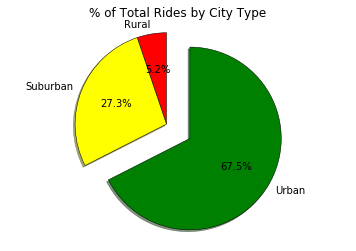

In [36]:
# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()




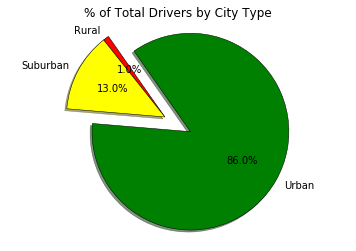

In [37]:
# of driver per city type
driver_sum = by_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()


